# Mandatory assignment 2

INF5860 / INF9860 - Machine Learning for Image Analysis  
University of Oslo  
Spring 2018  
  
  
Handout: 02.03.2018  
Delivery deadline: 23.03.2018, 23:59]


## Image classification with deep learning and dense neural networks

In this exercise, you are supposed to implement a basic neural network for image classification. The network will be densly connected, with an arbitrary number of layers, and number of nodes in each layer. We shall implement a ReLu activation function, and use a softmax activation in the last layer. The error will be measured with a cross-entropy loss function, and the cost will be minimized using a stochastic gradient descent optimization routine.


### Evaluation format

You will be guided through the implementation step by step, and you can check your implementation at each step. Each subtask will be judged independently, so it should be possible to do one task even if you have not succeded in the previous. Note, however, that each step needs to be correct in order for the whole method to work at the end.

### Exercise content

- All subtasks that you are to answer is found in this notebook.
- In addition, there is a `src` folder that contains a skeleton for the classifier, including a complete way to import data.
- All implementation should be done in the respective files in the `src` folder

```
def implement_this_function(argument_1):
    """This is an illustrative dummy function"""
    # TODO: Task X.Y
    result = None
    
    return result
```
- Some function headers are already given, and necessary, as they are called by the subtasks in this notebook.
- Everything else you feel you need to implement, you can implement as you like.
- When you have implemented everything (correctly), you should be able to run the whole classifier as `python src/main.py`
- Suggestion about the values of different hyperparameters will be given, but you are encouraged to experiment in the final subtask.

### What you should implement

The skeleton of this program that is already implemented contains things such as:
- Program setup
- Configurations
- Data import of three datasets: mnist, cifar10, and svhn
- Training framework
- Evaluation framework

You should implement the content in the training framework. All steps will be given as tasks and subtasks below. The following are *you* supposed to implement.
1. Parameter initialization
2. Forward propagation through a network with *arbitrary number of layer* where each layer has an *arbitrary number of nodes*
  1. ReLu activation function
  2. Softmax function
  3. The rest of the forward propagation
3. Cross Entropy cost function
4. Backward propagation through network with *arbitrary number of layer* where each layer has an *arbitrary number of nodes*
  1. Derivative of the ReLu activation function
  2. The rest of the backwar propagation
5. Parameter update using Gradient Descent optimization
6. Run the finished method
  1. Reproduce result with default settings
  2. Exceed the default result by experimenting with different hyperparameter configurations.


### Additional notes

Most variables should be self-explanatory, but there are four important dictionaries worth mentioning, as they will control the data flow of the entire program

- `conf`: Contains all configurations of the program. These configurations will be passed around most functions, even though we most often will only need a couple of them; this is so that you are freer to experiment outside the boundaries of the program skeleton. They are set with some default values in the `config()` function in `src/main.py`.
- `params`: Contains all trainiable parameters, that is, all weight and bias arrays.
- `grads`: Contains the gradients of the respective trainable parameters.
- `features`: Contains input and output data, in addition to linear combination arrays `Z` and activation arrays `A`.

It is *strongly* encouraged to implement the vectorized version of things, otherwise, things are to slow.

This should be it. Let us begin.


### Notebook set up

In [20]:
import random
import numpy as np
import matplotlib.pyplot as plt

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def compare_result(expected, proposed, name):
    """Compares the expected result agains the proposed result and prints some information"""
    if proposed is None:
        print("The {} does not seem to be implemented yet.".format(name))
        return
    if np.allclose(expected, proposed):
        print("Correct {}!".format(name))
    else:
        print("This does not seem entirely correct.")
        print("This could mean that there is something wrong with the implementation of {}.".format(name))
        print("The difference between expected and proposed result is")
        print(expected - proposed)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Task 1: Parameter initialization

The function you are to implement is `initialization(layer_dimensions)`, located in `src/model.py`. The parameters shall have the following shape

$$
\begin{align}
    W^{[l]} &\in \mathbb{R}^{n^{[l-1]}\times n^{[l]}} \\
    b^{[l]} &\in \mathbb{R}^{n^{[l]}}
\end{align}
$$

and have the following values

$$
\begin{align}
    W_{jk}^{[l]} &\sim \mathcal{N}\left(0, \frac{2}{n^{[l-1]}}\right) \\
    b_k^{[l]} &= 0
\end{align}
$$

for all $j = 1, \ldots, n^{[l-1]}$, $k = 1, \ldots, n^{[l]}$, $l = 1, \ldots, L$. Here $x \sim \mathcal{N}(\mu, \sigma^2)$ means that $x$ is sampled from a normal (or gaussian) distribution with mean $\mu$ and variance $\sigma^2$. In order to achieve the normal sampling in python, you can use the `numpy.random.normal()` function.  

This initialization fits well with ReLu activations, and is proposed in [He et al. (2015)](https://arxiv.org/pdf/1502.01852.pdf). For another common initialization scheme, you can study the paper by [Glorot and Hinton (2010)](http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf).

In [21]:
# Import the function you have implemented
from src.model import initialization

# This dummy network has 784 input nodes, two hidden layers with 128 and 32 nodes, respectively, and
# an output layer with 10 nodes
conf = {'layer_dimensions': [784, 128, 32, 10]}

# You should implement this function
params = initialization(conf)

# Check your results against the expected. Note that since we are dealing with (pseudo) randomness and
# small samples, the values of your array may differ some from the expected. But the absolute difference
# should not be very much larger than the order of 0.0001 for W_1, 0.001 for W_2, and 0.01 for W_3.
for key, value in sorted(params.items()):
    print("{}".format(key))
    print("    Shape = {}".format(value.shape))
    if key[0] == "W":
        n_lm1 = value.shape[0]
        print("    Mean: {0:>9.6f} vs {1:>9.6f} Abs diff: {2:>9.6f}".format(np.mean(value),
                                                                            0.0,
                                                                            np.abs(np.mean(value) - 0.0)))
        print("     Std: {0:>9.6f} vs {1:>9.6f} Abs diff: {2:>9.6f}".format(np.std(value),
                                                                            np.sqrt(2/n_lm1),
                                                                            np.abs(np.std(value) - np.sqrt(2/n_lm1))))
    else:
        print("     Min: {} vs {}".format(np.min(value), 0.0))
        print("     Max: {} vs {}".format(np.max(value), 0.0))

W_1
    Shape = (784, 128)
    Mean: -0.000031 vs  0.000000 Abs diff:  0.000031
     Std:  0.050723 vs  0.050508 Abs diff:  0.000216
W_2
    Shape = (128, 32)
    Mean: -0.000207 vs  0.000000 Abs diff:  0.000207
     Std:  0.124795 vs  0.125000 Abs diff:  0.000205
W_3
    Shape = (32, 10)
    Mean:  0.004909 vs  0.000000 Abs diff:  0.004909
     Std:  0.230658 vs  0.250000 Abs diff:  0.019342
b_1
    Shape = (128, 1)
     Min: 0.0 vs 0.0
     Max: 0.0 vs 0.0
b_2
    Shape = (32, 1)
     Min: 0.0 vs 0.0
     Max: 0.0 vs 0.0
b_3
    Shape = (10, 1)
     Min: 0.0 vs 0.0
     Max: 0.0 vs 0.0


## Task 2: Forward propagation

In this task, you shall implement a ReLu activation function and a softmax function, in addition to the rest of the forward propagation. You must figure out yourself when and how to use the softmax and ReLu functions.

### Task 2 a): ReLu activation function

The rectified linear unit has the following form

$$
g(x) =
\begin{cases}
  x, &\quad x \ge 0 \\
  0, &\quad x < 0.
\end{cases}
$$

and is supposed to be used as an activation function in all nodes, in all hidden layers.

In [18]:
# Import the function you have implemented
from src.model import activation
from src.tests import task_2a

# First, we load the dummy input, and the expected output
input_Z, expected_A = task_2a()

print(input_Z.shape[0], input_Z.shape[1])
print(expected_A)

# You should implement this function
A = activation(input_Z, 'relu')

# Check the result
compare_result(expected_A, A, "Relu activation")

3 3
[[ 0.    0.    3.  ]
 [ 0.    1.    5.  ]
 [ 0.    0.12  0.  ]]
Correct Relu activation!


### Task 2 b): Softmax function

The $k$th element of a softmax function evaluated on a vector $x \in \mathbb{R}^n$ is given by

$$
s(x)_k = \frac{e^{x_k}}{\sum_{j=1}^n e^{x_j}}
$$

and is supposed to be used on the linear activations in the last layer. When this function is to be used on "real data", it is adviced to implement the "tricks" introduced in lecture 4, to guard against numerical instability.

In [19]:
# Import the function you have implemented
from src.model import softmax
from src.tests import task_2b

# First, we load the dummy input and the expected output
input_Z, expected_S = task_2b()


# You should implement this function. Note that we often also use Ŷ to symbolise the output of the network.
S = softmax(input_Z)

# Check the result
compare_result(expected_S, S, "softmax")

Correct softmax!


### Task 2 c): Forward propagation

In this task, you shall implement the forward propagation, from data input to softmax output. This means that you will need the above two functions. This also means that the correctness of this task is dependent on the correctness of the relu and softmax task above. This is a bit unfortunate, as this should ideally be a standalone task, but I believe that the ReLu and softmax functions are simple enough that this should not be a very large problem.

The forward propagation should be able to handle an arbitrary number of layers and nodes, determined by the `conf['layer_dimensions']` parameter. It should also handle a batch of inputs.

In [13]:
# Import the function you have implemented
from src.model import forward
from src.tests import task_2c

# We load the input and expected output
conf, X_batch, params, expected_Z_1, expected_A_1, expected_Z_2, expected_Y_proposed = task_2c()

print(conf)
print(X_batch)
print(params)
#print(list(params.keys()))
#print(np.dot(params['W_1'].transpose(), X_batch))
#print(expected_Z_1)
#print(expected_A_1)
#print(np.dot( params['W_1'].transpose() ,  X_batch) )
#print(params['b_1'] )
#print(np.dot( params['W_1'].transpose() ,  X_batch) + params['b_1'] )
#print(expected_Z_1)
#print(np.dot( params['W_1'].transpose() ,  X_batch) + params['b_1'] - expected_Z_1)


# Implement this function yourself
Y_proposed, features = forward(conf, X_batch, params, is_training=True)
#print( features)
#print( Y_proposed)
#print( expected_Y_proposed)

compare_result(X_batch, features['A_0'], "feature A_0")
compare_result(expected_Z_1, features['Z_1'], "feature Z_1")
compare_result(expected_A_1, features['A_1'], "feature A_1")
compare_result(expected_Z_2, features['Z_2'], "feature Z_2")
compare_result(expected_Y_proposed, Y_proposed, "proposed Y")

{'layer_dimensions': [3, 5, 4], 'activation_function': 'relu'}
[[ 1  2 -5  4  5 -2]
 [-2 -3  5  3 -1  0]
 [-4  3  3  4  2  3]]
{'W_1': array([[ 0.1,  0.2,  0.3,  0.4,  0.1],
       [-0.1,  0.2, -0.3,  0.4,  0.2],
       [ 0. ,  0. ,  0.1,  0.2, -0.2]]), 'W_2': array([[ 0.3, -0.2,  0. ,  0.2],
       [ 0.3, -0.1, -0.2,  0.1],
       [ 0.4,  0.2,  0.1,  0.2],
       [-0.1,  0. ,  0. , -0.2],
       [-0.1,  0. ,  0. , -0.2]]), 'b_1': array([[ 0.2],
       [-0.2],
       [ 0.1],
       [-0.4],
       [-0.2]]), 'b_2': array([[ 0.4],
       [-0.2],
       [-0.4],
       [ 0.5]])}
Correct feature A_0!
Correct feature Z_1!
Correct feature A_1!
Correct feature Z_2!
Correct proposed Y!


## Task 3: Cross Entropy cost function

Given a batch of predicted outputs $\hat{Y} = (\hat{y}_1, \ldots, \hat{y}_m)$ and a batch of reference (one-hot encoded) outputs $\tilde{Y} = (\tilde{y}_1, \ldots, \tilde{y}_m)$, such that
$\hat{y}^{(i)}, \tilde{y}^{(i)} \in \mathbb{R}^n$ for $i = 1, \ldots, m$, the cross entropy cost is given by

$$
C(\hat{Y}, \tilde{Y}) = -\frac{1}{m}\sum_{i=1}^m\sum_{k=1}^{n} \tilde{y}_k^{(i)}\log \hat{y}_k^{(i)}.
$$

In [6]:
# Import the function you have implemented
from src.model import cross_entropy_cost
from src.tests import task_3

# Generate some dummy input and corresponding expected output
Y_proposed, Y_batch, expected_cost_value, expected_num_correct = task_3()

# You should implement this function
cost_value, num_correct = cross_entropy_cost(Y_proposed, Y_batch)

compare_result(expected_cost_value, cost_value, "cost value")
compare_result(expected_num_correct, num_correct, "number of correct predictions")

Correct cost value!
Correct number of correct predictions!


## Task 4: Backward propagation

In this task, you shall compute the gradients of the trainable parameters with respect to the cost value. In order to compute them, we will need the following equations.

$$
\begin{align}
  \nabla_{W^{[l]}} \mathcal{C} &= \frac{1}{m} A^{[l-1]} \mathcal{J}_{z^{[l]}}{(\mathcal{C})}^\intercal \\
  \nabla_{b^{[l]}} \mathcal{C} &= \frac{1}{m}\left( \mathcal{J}_{z^{[l]}}{(\mathcal{C})} \right) \mathbf{1}(m) \\
  \mathcal{J}_{z^{[l]}}{(\mathcal{C})}&=g'(Z^{[l]})\circ \left(W^{[l+1]} \mathcal{J}_{z^{[l+1]}}{(\mathcal{C})}\right) \\
  \mathcal{J}_{z^{[L]}}{(\mathcal{C})} &= \hat{Y} - \tilde{Y}.
\end{align}
$$

I refer to the [lecture slides](https://www.uio.no/studier/emner/matnat/ifi/INF5860/v18/undervisningsmateriale/lectures/slides_inf5860_s18_week04.pdf) for the derivation and explanation of the different terms.

### Task 4 a): Derivative of the activation function

In order to compute the parameter gradients, we need a function to compute the derivative of the relu activation function. If we take some freedoms, we can use the Heaviside step-function as the derivative of the ReLu activation

$$
g'(x) =
\begin{cases}
  1, &\quad x \ge 0 \\
  0, &\quad x < 0.
\end{cases}
$$

In [7]:
# Import your function
from src.model import activation_derivative
from src.tests import task_4a

# Load dummy input and expected output
input_Z, expected_dg_dz = task_4a()

# You should implement this
dg_dz = activation_derivative(input_Z, "relu")

# Compare your result with the expected
compare_result(expected_dg_dz, dg_dz, "activation function derivative")

Correct activation function derivative!


### Task 4 b): Backward propagation

Use the equations above, and the function you implemented in Task 4 a) to compute all necessary parameter gradients.

In [8]:
# Import your function
from src.model import backward
from src.tests import task_4b

# Load dummy input and expected output
(conf, Y_proposed, Y_batch, params, features,
 expected_grad_W_1, expected_grad_b_1, expected_grad_W_2, expected_grad_b_2) = task_4b()

#print(conf)
print(params)
print(features)
#print(Y_proposed)
#print(Y_batch)

# This is the function that you shall implement
grad_params = backward(conf, Y_proposed, Y_batch, params, features)

# Check your implementation
compare_result(expected_grad_W_1, grad_params['grad_W_1'], "gradient of cost w.r.t. W_1")
compare_result(expected_grad_b_1, grad_params['grad_b_1'], "gradient of cost w.r.t. b_1")
compare_result(expected_grad_W_2, grad_params['grad_W_2'], "gradient of cost w.r.t. W_2")
compare_result(expected_grad_b_2, grad_params['grad_b_2'], "gradient of cost w.r.t. b_2")

{'W_1': array([[ 0.1,  0.2,  0.3,  0.4,  0.1],
       [-0.1,  0.2, -0.3,  0.4,  0.2],
       [ 0. ,  0. ,  0.1,  0.2, -0.2]]), 'W_2': array([[ 0.3, -0.2,  0. ,  0.2],
       [ 0.3, -0.1, -0.2,  0.1],
       [ 0.4,  0.2,  0.1,  0.2],
       [-0.1,  0. ,  0. , -0.2],
       [-0.1,  0. ,  0. , -0.2]]), 'b_1': array([[ 0.2],
       [-0.2],
       [ 0.1],
       [-0.4],
       [-0.2]]), 'b_2': array([[ 0.4],
       [-0.2],
       [-0.4],
       [ 0.5]])}
{'A_0': array([[ 1,  2, -5,  4,  5, -2],
       [-2, -3,  5,  3, -1,  0],
       [-4,  3,  3,  4,  2,  3]]), 'Z_1': array([[ 0.5,  0.7, -0.8,  0.3,  0.8,  0. ],
       [-0.4, -0.4, -0.2,  1.2,  0.6, -0.6],
       [ 0.6,  1.9, -2.6,  0.8,  2.1, -0.2],
       [-1.6, -0.2,  0.2,  3.2,  1.6, -0.6],
       [ 0.3, -1.2, -0.3,  0. , -0.3, -1. ]]), 'A_1': array([[ 0.5,  0.7,  0. ,  0.3,  0.8,  0. ],
       [ 0. ,  0. ,  0. ,  1.2,  0.6,  0. ],
       [ 0.6,  1.9,  0. ,  0.8,  2.1,  0. ],
       [ 0. ,  0. ,  0.2,  3.2,  1.6,  0. ],
       [ 0.3,  0

## Task 5: Update parameters

Given some learning rate $\lambda \in \mathbb{R}$, the gradient descent update is given by

$$
\begin{align}
  w_{jk}^{[l]} &\gets w_{jk}^{[l]} - \lambda \frac{\partial \mathcal{C}}{\partial w_{jk}^{[l]}} \\
  b_k^{[l]}    &\gets b_k^{[l]} - \lambda \frac{\partial \mathcal{C}}{\partial b_k^{[l]}}
  \end{align}
$$

for all

$$
\begin{cases}
  j &= 1, \ldots, n^{[l-1]} \\
  k &= 1, \ldots, n^{[l]} \\
  l &= 1, \ldots, L
\end{cases}
$$

In [22]:
# Import your function
from src.model import gradient_descent_update
from src.tests import task_5

# Load dummy input and expected output
(conf, params, grad_params, expected_updated_W_1, expected_updated_b_1, expected_updated_W_2, expected_updated_b_2) = task_5()




# You should implement this function
updated_params = gradient_descent_update(conf, params, grad_params)



# Check your results
compare_result(expected_updated_W_1, updated_params['W_1'], "update of W_1")
compare_result(expected_updated_b_1, updated_params['b_1'], "update of b_1")
compare_result(expected_updated_W_2, updated_params['W_2'], "update of W_2")
compare_result(expected_updated_b_2, updated_params['b_2'], "update of b_2")

Correct update of W_1!
Correct update of b_1!
Correct update of W_2!
Correct update of b_2!


## Task 6: Putting everything together

Now it is time to test our implementation on some data. In `src/import_data.py` there is automated scripts for importing the following datasets

- MNIST
- CIFAR10
- SVHN

These are chosen because they contain small images, and therefore easy to experiment with. Below, you will find results from training sessions on all datasets using the default configuration.

**Default configuration**

```
hidden_layers = [128, 32]
devel_size = 5000
activation_function = 'relu'
batch_size = 128
learning_rate = 1.0e-2
```

### How to report results

The most important is that you are able to present your findings in an understandable way. It is most convenient for everyone that you report your results in this notebook. Below follows three different suggestions of ways to do this.

**Method 1: Running program and manually copy/paste results here**

This is done in the examples below, and is nice because of the danger of overwriting things by accident is smaller. But beware that the notebook kernel often needs to be restarted (or similar) before changes are noticed.

To do this, some markdown formatting is worth explaining. You can find the jupyter notebook markdown cell specification at [here](http://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html)
Images can be linked to as follows

```
![caption name](relative/path/to/image.png)
```

and you can create monospaced blocks by enclosing the block with three "accent grave" symbols at the top and bottom of the block. The following block

will be rendered as

```
Cell content here
```

** Method 2: Running your program inside the notebook**

You can import the program here, and run the program. This is possibly the simplest, but be careful not to overwrite results. In order for this to work, you need to put the source directory in the python path.

In [16]:
import sys
import os

src_dir = os.path.join(os.getcwd(), "src")
if src_dir not in sys.path:
    sys.path.append(src_dir)

In [ ]:
# Import main and run
from src.main import main

main()

Loading MNIST data from  /tmp/data/mnist


** Method 3: Running your program inside the notebook**

Instead of importing the `main()` function, you can copy/paste the content of `main()` here, and run things manually with the desired config. This is a bit verbose, but is less prone to overwrite existing results. For this method, you need to add the source directory to the python path as shown in **Method 2**.

Loading MNIST data from  /tmp/data/mnist
Run training
Number of training examples in one epoch:  55000
Start training
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number0
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number1
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number2
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number3
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number5
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number6
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number7
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number8
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number9
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number10
Finish Foward
Finish Backward
Fini

Finish Training
Finish Training
Finish Training
Finish Training
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number100
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number101
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number102
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number103
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number104
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number105
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number106
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number107
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number108
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number109
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number110
Finish Foward
Finish Backward
Finish Gradient Update
Finish Trainin

Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number200
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number201
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number202
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number203
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number204
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number205
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number206
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number207
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number208
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number209
Finish Foward
Finish Backward
Fini

Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number300
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number301
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number302
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number303
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number304
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number305
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number306
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number307
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number308
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number309
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number310
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number311
Finish Foward
Finish Backward
Finish Gradient Update

Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number409
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number410
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number411
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number412
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number413
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number414
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number415
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number416
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number417
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number418
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number419
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number420
Finish Foward
Finish Backward
Finish Gradient Update

Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number520
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number521
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number522
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number523
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number524
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number525
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number526
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number527
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number528
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number529
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number530
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number531
Finish Foward
Finish Backward
Finish Gradient Update

Finish Backward
Finish Gradient Update
Finish Training Number633
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number634
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number635
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number636
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number637
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number638
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number639
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number640
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number641
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number642
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number643
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number644
Finish Foward
Finish Backward
Finish Gradient Update
Finish Traini

Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number733
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number734
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number735
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number736
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number737
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number738
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number739
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number740
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number741
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number742
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number743
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number744
Finish Foward
Finish Backward
Finish Gradient Update

Finish Backward
Finish Gradient Update
Finish Training Number834
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number835
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number836
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number837
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number838
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number839
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number840
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number841
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number842
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number843
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number844
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number845
Finish Foward
Finish Backward
Finish Gradient Update
Finish Traini

Finish Gradient Update
Finish Training Number942
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number943
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number944
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number945
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number946
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number947
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number948
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number949
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number950
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number951
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number952
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number953
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number954
Fin

Finish Backward
Finish Gradient Update
Finish Training Number1043
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number1044
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number1045
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number1046
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number1047
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number1048
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number1049
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number1050
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number1051
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number1052
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number1053
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number1054
Finish Foward
Finish Backward
Finish Gradient Update
F

Finish Backward
Finish Gradient Update
Finish Training Number1139
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number1140
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number1141
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number1142
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number1143
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number1144
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number1145
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number1146
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number1147
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number1148
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number1149
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number1150
Finish Foward
Finish Backward
Finish Gradient Update
F

Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number1237
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number1238
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number1239
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number1240
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number1241
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number1242
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number1243
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number1244
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number1245
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number1246
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number1247
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number1248
Finish Foward
Finish Backward
Finish Gra

Finish Backward
Finish Gradient Update
Finish Training Number1332
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number1333
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number1334
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number1335
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number1336
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number1337
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number1338
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number1339
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number1340
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number1341
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number1342
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number1343
Finish Foward
Finish Backward
Finish Gradient Update
F

Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number1439
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number1440
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number1441
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number1442
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number1443
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number1444
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number1445
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number1446
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number1447
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number1448
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number1449
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number1450
Finish Foward
Finish Backward
Finish Gra

Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number1546
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number1547
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number1548
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number1549
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number1550
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number1551
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number1552
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number1553
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number1554
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number1555
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number1556
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number1557
Finish Foward
Finish Backward
Finish Gra

Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number1642
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number1643
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number1644
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number1645
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number1646
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number1647
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number1648
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number1649
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number1650
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number1651
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number1652
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number1653
Finish Foward
Finish Backward
Finish Gra

Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number1772
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number1773
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number1774
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number1775
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number1776
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number1777
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number1778
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number1779
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number1780
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number1781
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number1782
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number1783
Finish Foward
Finish Backward
Finish Gra

Finish Backward
Finish Gradient Update
Finish Training Number1882
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number1883
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number1884
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number1885
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number1886
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number1887
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number1888
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number1889
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number1890
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number1891
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number1892
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number1893
Finish Foward
Finish Backward
Finish Gradient Update
F

Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number2000
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number2001
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number2002
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number2003
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Num

Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number2100
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number2101
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number2102
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number2103
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number2104
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number2105
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number2106
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number2107
Finish F

Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number2200
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number2201
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number2202
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number2203
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Num

Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number2300
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number2301
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number2302
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number2303
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number2304
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number2305
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number2306
Finish F

Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number2400
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number2401
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number2402
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number2403
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number2404
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number2405
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number2406
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number2407
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Num

Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number2500
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number2501
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number2502
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number2503
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number2504
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number2505
Finish Foward
Finish Backward
Finish Gradient Update
Fin

Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number2600
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number2601
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number2602
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number2603
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number2604
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Num

Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number2700
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number2701
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number2702
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number2703
Finish Foward
Finish Backward
Finish Gra

Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number2800
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number2801
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number2802
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number2803
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number2804
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number2805
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number2806
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number2807
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number2808
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number2809
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number2810
Finish Foward
Finish Bac

Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number2900
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number2901
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number2902
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number2903
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number2904
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number2905
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number2906
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Num

Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number3000
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number3001
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number3002
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number3003
Finish Foward
Finish Backward
Finish Gradient Update
Fin

Finish Backward
Finish Gradient Update
Finish Training Number3103
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number3104
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number3105
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number3106
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number3107
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number3108
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number3109
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number3110
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number3111
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number3112
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number3113
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number3114
Finish Foward
Finish Backward
Finish Gradient Update
F

Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number3228
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number3229
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number3230
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number3231
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number3232
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number3233
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number3234
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number3235
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number3236
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number3237
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number3238
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number3239
Finish Foward
Finish Backward
Finish Gra

Finish Backward
Finish Gradient Update
Finish Training Number3363
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number3364
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number3365
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number3366
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number3367
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number3368
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number3369
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number3370
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number3371
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number3372
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number3373
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number3374
Finish Foward
Finish Backward
Finish Gradient Update
F

Finish Backward
Finish Gradient Update
Finish Training Number3460
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number3461
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number3462
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number3463
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number3464
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number3465
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number3466
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number3467
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number3468
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number3469
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number3470
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number3471
Finish Foward
Finish Backward
Finish Gradient Update
F

Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number3586
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number3587
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number3588
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number3589
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number3590
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number3591
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number3592
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number3593
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number3594
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number3595
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number3596
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number3597
Finish Foward
Finish Backward
Finish Gra

Finish Backward
Finish Gradient Update
Finish Training Number3695
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number3696
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number3697
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number3698
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number3699
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish

Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number3796
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number3797
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number3798
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number3799
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Foward
Finish Backward
Finish Gra

Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number3900
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number3901
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number3902
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number3903
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Num

Finish Training
Finish Training
Finish Training
Finish Training
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4000
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4001
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4002
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4003
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4004
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4005
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4006
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4007
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4008
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4009
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4010
Finish Foward
Finish Backward
Finish Gradient Update
Fin

Finish Backward
Finish Gradient Update
Finish Training Number4105
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4106
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4107
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4108
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4109
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4110
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4111
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4112
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4113
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4114
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4115
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4116
Finish Foward
Finish Backward
Finish Gradient Update
F

Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4217
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4218
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4219
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4220
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4221
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4222
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4223
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4224
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4225
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4226
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4227
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4228
Finish Foward
Finish Backward
Finish Gra

Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4316
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4317
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4318
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4319
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4320
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4321
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4322
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4323
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4324
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4325
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4326
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4327
Finish Foward
Finish Backward
Finish Gra

Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4420
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4421
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4422
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4423
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4424
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4425
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4426
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4427
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4428
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4429
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4430
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4431
Finish Foward
Finish Backward
Finish Gra

Finish Backward
Finish Gradient Update
Finish Training Number4535
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4536
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4537
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4538
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4539
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4540
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4541
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4542
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4543
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4544
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4545
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4546
Finish Foward
Finish Backward
Finish Gradient Update
F

Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4636
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4637
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4638
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4639
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4640
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4641
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4642
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4643
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4644
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4645
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4646
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4647
Finish Foward
Finish Backward
Finish Gra

Finish Backward
Finish Gradient Update
Finish Training Number4737
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4738
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4739
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4740
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4741
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4742
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4743
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4744
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4745
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4746
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4747
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4748
Finish Foward
Finish Backward
Finish Gradient Update
F

Finish Backward
Finish Gradient Update
Finish Training Number4847
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4848
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4849
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4850
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4851
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4852
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4853
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4854
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4855
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4856
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4857
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4858
Finish Foward
Finish Backward
Finish Gradient Update
F

Finish Gradient Update
Finish Training Number4955
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4956
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4957
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4958
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4959
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4960
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4961
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4962
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4963
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4964
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4965
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training Number4966
Finish Foward
Finish Backward
Finish Gradient Update
Finish Training N

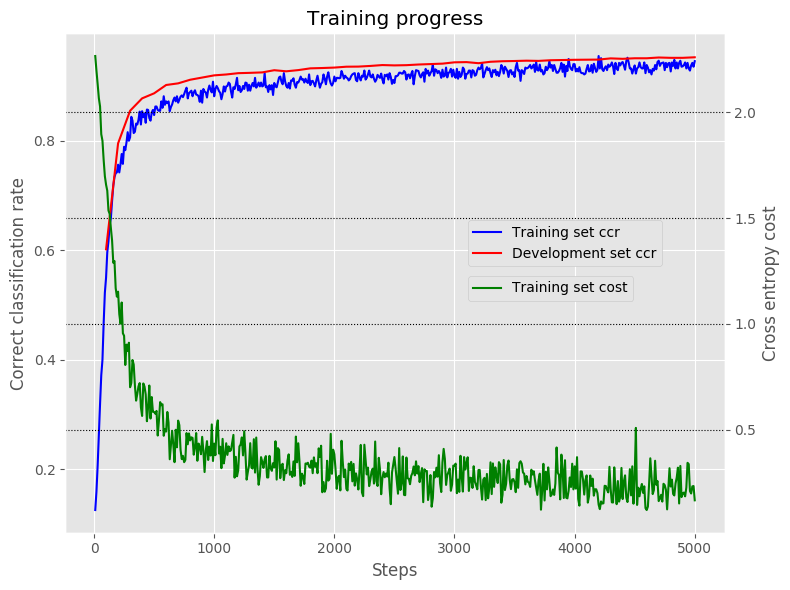

Evaluating train set
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Finish Training
Fin

In [1]:
# Import the module

import sys
import os

src_dir = os.path.join(os.getcwd(), "src")
if src_dir not in sys.path:
    sys.path.append(src_dir)
    
    
import src.main as main
import src.run as run


import time
import numpy as np
import model

# Import config, and do changes if you want to
conf = main.config()
conf['max_steps'] = 5000

X_train, Y_train, X_devel, Y_devel, X_test, Y_test = main.get_data(conf)




params, train_progress, devel_progress = run.train(conf, X_train, Y_train, X_devel, Y_devel)

main.plot_progress(train_progress, devel_progress)

print("Evaluating train set")
num_correct, num_evaluated = run.evaluate(conf, params, X_train, Y_train)
print("CCR = {0:>5} / {1:>5} = {2:>6.4f}".format(num_correct, num_evaluated,
                                                 num_correct/num_evaluated))
print("Evaluating development set")
num_correct, num_evaluated = run.evaluate(conf, params, X_devel, Y_devel)
print("CCR = {0:>5} / {1:>5} = {2:>6.4f}".format(num_correct, num_evaluated,
                                                num_correct/num_evaluated))
print("Evaluating test set")
num_correct, num_evaluated = run.evaluate(conf, params, X_test, Y_test)
print("CCR = {0:>5} / {1:>5} = {2:>6.4f}".format(num_correct, num_evaluated,
                                                 num_correct/num_evaluated))


### Examples

Below is shown some examples using the default configurations.

#### MNIST - 2000 steps

![Example training progress](figures/mnist_progress_default.png)

```
Evaluating train set
CCR = 50173 / 55000 = 0.9122
Evaluating development set
CCR =  4668 /  5000 = 0.9336
Evaluating test set
CCR =  9158 / 10000 = 0.9158
```

#### CIFAR10 - 10000 steps

![Example training progress](figures/cifar10_progress_default.png)

```
Evaluating train set
CCR = 22475 / 45000 = 0.4994
Evaluating development set
CCR =  2336 /  5000 = 0.4672
Evaluating test set
CCR =  4632 / 10000 = 0.4632
```

#### SVHN - 10000 steps

![Example training progress](figures/svhn_progress_default.png)

```
Evaluating train set
CCR = 49392 / 68257 = 0.7236
Evaluating development set
CCR =  3576 /  5000 = 0.7152
Evaluating test set
CCR = 17691 / 26032 = 0.6796
```

### Task 6 a): Reproduce results

On all datasets, try to reproduce the results shown above in the examples, with the same configurations. Because of random initialization, it is not expected that the results are exactly the same, even if the implementation is exactly identical to the one used to produce the examples. Report the results in cells below this one.

### Task 6 b): Exceed results

Experiment with different configurations and try to beat the classification results above. We expect you to experiment a bit, and to give an effort in improving the results, but you will not be judged by whether you managed to exceed the results or not.

Suggested things to edit are listed below. Some are available if you have implemented everything in this assignment correctly, others will need some extra implementation. 

- Out of the box
  - Step length (learning rate)
  - Number of layers
  - Number of nodes in the layers
  - Number of training steps
- Things you have to implement yourself
  - Activation function
  - Parameter initialization
  - Optimization routine
  - Data standardization
  
Report your results, in addition to the configuration used, in cells below this one.

In [ ]:
MNIST - 3000 steps

Evaluating train set
CCR = 50790 / 55000 = 0.9235
Evaluating development set
CCR =  4708 /  5000 = 0.9416
Evaluating test set
CCR =  9279 / 10000 = 0.9279


MNIST - 5000 steps
Evaluating train set
CCR = 51613 / 55000 = 0.9384
Evaluating development set
CCR =  4750 /  5000 = 0.9500
Evaluating test set
CCR =  9376 / 10000 = 0.9376
